In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys 
import os

# TODO: make more pythonic
# this line walks up file directory so rule-vetting is cwd
# Currently this breaks if chunk is run multiple times
os.chdir(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))))
print(os.getcwd())

/accounts/grad/wtorous/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


/accounts/grad/wtorous/rule-vetting


In [159]:
import rulevetting.api.viz as viz
from rulevetting.projects.csi_pecarn.eda_dataset import Dataset

In [160]:
full_sample_data = Dataset().get_data(preprocess=True,extract_features=False,impute=False,control_types=['none'])[0]
# use full sample only for demographic trends, random control only for EDA
eda_df = Dataset().get_data(preprocess=True,extract_features=False,impute=False,control_types=['ran'])[0]

IC Removed: 188
Radiology Removed: 19
MOI Removed: 19
# no information: 9


/accounts/grad/wtorous/rule-vetting/rulevetting/projects/csi_pecarn/helper.py:138: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # note we remove the `_binary` suffix, will do this for other variables later in this function


A:: count     3314
unique       4
top         ND
freq      2705
Name: Ethnicity_posthoc, dtype: object


/accounts/grad/wtorous/rule-vetting/rulevetting/projects/csi_pecarn/eda_dataset.py:431: UserWarning: Persisting input arguments took 2.12s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  if preprocess:


split_data kwargs {'control_types': ['none']}
split_data kwargs {'control_types': ['ran']}


In [162]:
print(eda_df.shape)

(944, 335)


In [163]:
outcome_def = 'csi_injury'

In [164]:
# get list of columns with only two recorded outcomes
binary_columns = eda_df.columns[eda_df.nunique()==2]
binary_eda_data = eda_df.loc[:,binary_columns].copy() 

cat_columns = eda_df.columns[eda_df.nunique()!=2]
cat_eda_data = eda_df.loc[:,cat_columns].copy()
cat_eda_data.loc[:,outcome_def] = eda_df.loc[:,outcome_def].copy() #add binary outcome indicator back in

In [165]:
# outcome indicator is double counted
print(eda_df.shape)
print(binary_eda_data.shape)
print(cat_eda_data.shape)

(944, 335)
(944, 279)
(944, 57)


In [166]:
print(list(binary_eda_data.columns))

['AlteredMentalStatus', 'LOC', 'FocalNeuroFindings', 'PainNeck', 'PosMidNeckTenderness', 'TenderNeck', 'Torticollis', 'SubInj_Head', 'SubInj_Face', 'SubInj_Ext', 'SubInj_TorsoTrunk', 'Predisposed', 'HighriskDiving', 'HighriskFall', 'HighriskHanging', 'HighriskHitByCar', 'HighriskMVC', 'HighriskOtherMV', 'AxialLoadAnyDoc', 'axialloadtop', 'PtTenderOther_ems', 'OtherInjuriesExtr_ems', 'MinorInjuriesPel_ems', 'MedsRecdOth_outside', 'PtTenderNeckLevelOther_outside', 'MinorInjuriesPelvis_outside', 'CervicalSpineImmobilization', 'CervicalSpineIntervCC', 'CervicalSpineIntervRLB', 'CervicalSpineIntervOther', 'MedsRecdAna', 'MedsRecdGlu', 'MedsRecdPar', 'MedsRecdSed', 'MedsRecdOR', 'PtCompPainHead', 'PtCompPainFace', 'PtCompPainNeck', 'PtCompPainChest', 'PtCompPainBack', 'PtCompPainFlank', 'PtCompPainAbd', 'PtCompPainPelvis', 'PtCompPainExt', 'PtTenderHead', 'PtTenderFace', 'PtTenderNeck', 'PtTenderNeckLevel', 'PtTenderNeckLevelC1', 'PtTenderNeckLevelC2', 'PtTenderNeckLevelC3', 'PtTenderNeckLev

In [167]:
print(list(cat_eda_data.columns))

['TotalGCSManual_ems', 'GCSEye_ems', 'VerbalGCS_ems', 'MotorGCS_ems', 'TotalGCS_ems', 'TotalGCSManual_outside', 'GCSEye_outside', 'VerbalGCS_outside', 'MotorGCS_outside', 'TotalGCS_outside', 'LocEvalPhysician', 'TotalGCSManual', 'GCSEye', 'VerbalGCS', 'MotorGCS', 'TotalGCS', 'OtherInjuriesFlank', 'AgeInYears', 'FallDownStairs', 'BodyAsAWhole2', 'BodyAsAWhole3', 'HematologicLymphatic1', 'AVPU_ems_AVPU_nan', 'AVPUMental_ems_AVPU_OB', 'AVPU_outside_AVPU_nan', 'AVPUMental_outside_AVPU_OB', 'AVPU_AVPU_nan', 'AVPUMental_AVPU_C', 'FieldDocumentation_ems', 'PatientsPosition_ems', 'EDDocumentation_outside', 'ModeArrivalOutsideHospital_outside', 'OutsideEDDisposition_outside', 'SectionGCSAvailable', 'TotalGCSAvailable', 'PtTenderNeckOtherTxtCat', 'OtherNeuroDeficitDesc', 'OtherNeuroDeficitDescCat', 'EDDisposition', 'PayorTypeCI_posthoc', 'PayorTypeMA_posthoc', 'OtherPredisposingCondition', 'Race_posthoc', 'PayorType_posthoc', 'Ethnicity_posthoc', 'OutcomeStudySite_posthoc', 'OutcomeStudySiteMobi

# Demographic EDA

In [168]:
demographic_df = full_sample_data[['Race_posthoc', 'PayorType_posthoc','Ethnicity_posthoc','Male','AgeInYears']].copy()

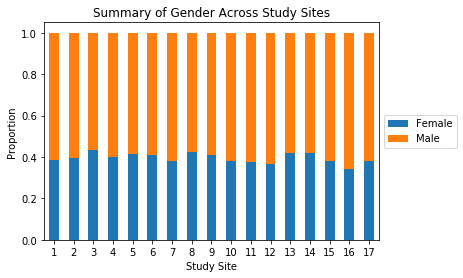

In [182]:
gender_df = demographic_df.replace([0,1],['Female','Male']).groupby('site')['Male'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Gender Across Study Sites')
gender_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.xlabel("Study Site")
plt.ylabel("Proportion")
plt.show()

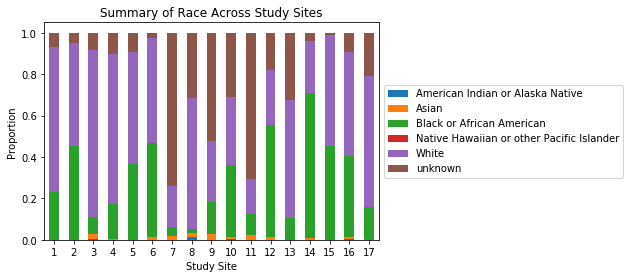

In [183]:
race_map = {
        'AI': 'American Indian or Alaska Native',
        'A': 'Asian',
        'B': 'Black or African American',
        'PI': 'Native Hawaiian or other Pacific Islander',
        'W': 'White',
        'ND': 'unknown',  # stated as unknown
        'O': 'unknown'  # other
    }

race_df = demographic_df['Race_posthoc'].map(race_map).groupby('site').value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Race Across Study Sites')
race_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.xlabel("Study Site")
plt.ylabel("Proportion")
plt.show()

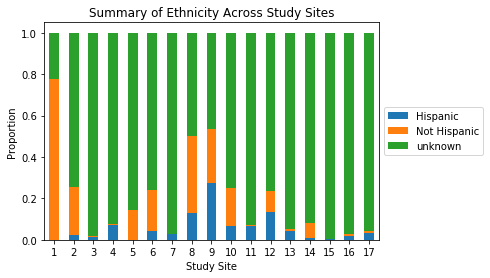

In [184]:
ethnicity_map = {
    'H':'Hispanic',
    'NH': 'Not Hispanic',
    'ND': 'unknown',
    'O': 'unknown'
    }

ethnicity_df = demographic_df['Ethnicity_posthoc'].map(ethnicity_map).groupby('site').value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Ethnicity Across Study Sites')
ethnicity_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.xlabel("Study Site")
plt.ylabel("Proportion")
plt.show()

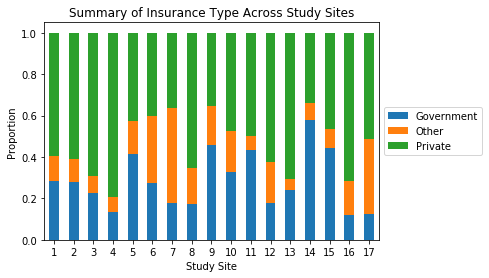

In [190]:
payor_map = {
    'CH':'Government',
    'OG':'Government',
    'WC':'Government',
    'MA':'Government',
    'CI':'Private',
    'SU':'Other',
    'ND':'Other'
    }

payor_df = demographic_df['PayorType_posthoc'].map(payor_map).groupby('site').value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Insurance Type Across Study Sites')
payor_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.xlabel("Study Site")
plt.ylabel("Proportion")
plt.show()

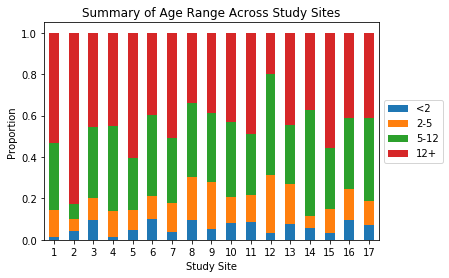

In [200]:
age_df = demographic_df.reset_index()[['site','AgeInYears']]


bins = [0, 2, 5, 12, np.inf]
names = ['<2', '2-5', '5-12', '12+']

age_df.loc[:,['AgeBin']] = pd.cut(age_df.loc[:,'AgeInYears'], bins, labels=names)

age_range_df = age_df.groupby('site')['AgeBin'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Age Range Across Study Sites')
age_range_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.xlabel("Study Site")
plt.ylabel("Proportion")

plt.show()


# Summary EDA

In [14]:
eda_df.describe()

,AlteredMentalStatus,LOC,FocalNeuroFindings,PainNeck,PosMidNeckTenderness,TenderNeck,Torticollis,SubInj_Head,SubInj_Face,SubInj_Ext,...,PtTenderNeckLevelC5_improved,CervicalSpinePrecautionsOther_improved,PtParesthesias_improved,PtCompPainChest_improved,CervicalSpinePrecautionsRLB_improved,PtCompPainAbd_improved,OtherInjuriesChest_improved,OtherNeuroDeficitDesc_improved,MedsRecdGlu_improved,ArrPtIntub_improved
count,3230.000000,3047.000000,2979.000000,3131.000000,3222.000000,3222.000000,3078.000000,3279.000000,3279.000000,3279.000000,...,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.0,3314.0,3314.0
mean,0.182972,0.376764,0.122524,0.356116,0.285537,0.375854,0.051982,0.125038,0.050015,0.093016,...,0.004828,0.112553,0.019916,0.017502,0.378998,0.016295,0.009354,0.0,0.0,0.0
std,0.386704,0.484655,0.327945,0.478927,0.451740,0.484418,0.222026,0.330813,0.218010,0.290499,...,0.069326,0.316093,0.139731,0.131150,0.485211,0.126625,0.096279,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0


In [13]:
binary_imputed_data = binary_eda_data.fillna(0)
print(binary_eda_data.shape, binary_imputed_data.shape)
binary_corrs = binary_imputed_data.corr(method='spearman')
cont_corrs = cont_eda_data.corr(method='spearman')

print(binary_imputed_data.columns)

(3314, 286) (3314, 286)


NameError: name 'cont_eda_data' is not defined

In [ ]:
binary_corrmap = sns.clustermap(binary_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
binary_corrmap.ax_row_dendrogram.set_visible(False)
binary_corrmap.ax_col_dendrogram.set_visible(False)
binary_corrmap.fig.suptitle("Spearman Correlation of Binary Covariates with Mean Imputation")

In [ ]:
cont_corrmap = sns.clustermap(cont_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
cont_corrmap.ax_row_dendrogram.set_visible(False)
cont_corrmap.ax_col_dendrogram.set_visible(False)

In [ ]:
plt.figure(dpi=250, figsize=(4, 7))
#vals = binary_corrs[outcome_def]
vals = binary_corrs['csi_injury']
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[-20:], vals[args][-20:])
plt.xlabel('Correlation w/ GCS Missing')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Top 20 Correlations")
plt.show()

In [ ]:
plt.figure(dpi=250, figsize=(4, 7))
vals = binary_corrs['csi_injury']
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[:25], vals[args][:25])
plt.xlabel('Correlation w/ outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [ ]:
list(binary_imputed_data.columns)

In [ ]:
cc_data = binary_imputed_data#[(binary_imputed_data['NonVerbal']==1)]
#confusion_matrix = pd.crosstab(cc_data['HighriskDiving'], cc_data['IntervForCervicalStabSurgical'], rownames=['CSI Injury'], colnames=['Neck Pain'])
#confusion_matrix = pd.crosstab(cc_data['csi_injury'], cc_data['PtTenderNeck'], rownames=['CSI Injury'], colnames=['Neck Pain'])

sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion Matrix for Injury and GCS with AlteredMentalStatus")
plt.show()


In [ ]:
intervention_types = [col_name for col_name in binary_imputed_data if 'IntervFor' in col_name]
injury_types = [col_name for col_name in binary_imputed_data if 'Highrisk' in col_name]

intervention_data = binary_imputed_data[injury_types+intervention_types]

In [ ]:
for injury in injury_types:
    intervention_information = intervention_data.drop([i for i in injury_types if i is not injury],axis=1)
    summary_data = intervention_information.groupby([injury]).mean()
    print(summary_data)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(binary_imputed_data[(binary_imputed_data['csi_injury']==1)&(binary_imputed_data['GCS_na']==0)])

In [ ]:
print(eda_df['TotalGCS'])

In [ ]:
plt.figure(dpi=250, figsize=(4, 7))
vals = cont_corrs[outcome_def]
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs, vals[args])
plt.xlabel('Correlation w/ outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(binary_corrs['GCS_NA_total'].sort_values())

In [ ]:
# EDA of Missingness

In [ ]:
# get percent missing by column
pd.set_option("display.max_rows", None, "display.max_columns", None)
print("25 Covariates with Highest Percent Missingness\n")
print("All Covariates:")
missing_frac = (eda_df.isna().sum() / eda_df.shape[0]) * 100
print(missing_frac.sort_values(ascending=False)[:])

In [ ]:
complete_covar = missing_frac[missing_frac==0.]
print("Covar. with no missing data:",len(complete_covar))

missing_columns = missing_frac[missing_frac!=0]
print("Covar. with some missing data:",len(missing_columns))

In [ ]:
binary_missing_bools = eda_df[missing_columns.index].isna()
binary_missing_corrs = binary_missing_bools.corr(method='spearman')

In [ ]:
corrmap = sns.clustermap(binary_missing_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)
plt.title("Correlation of Missigness by Covariate")

In [ ]:
print(max(binary_missing_corrs))

In [ ]:
print(sorted(binary_missing_corrs.iloc[:,3]))

In [ ]:
# EDA of Demographic Data

In [ ]:
eda_demographic_df = pd.read_csv("data/csi_pecarn/raw/demographics.csv").set_index(["studysubjectid"])
print(eda_demographic_df.columns)

In [ ]:
gender_df = eda_demographic_df.groupby('site')['Gender'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Gender Variable Across Study Sites')
gender_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
race_df = eda_demographic_df.groupby('site')['Race'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Race Variable Across Study Sites')
race_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
ethnicity_df = eda_demographic_df.groupby('site')['Ethnicity'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Ethnicity Variable Across Study Sites')
ethnicity_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
payor_df = eda_demographic_df.groupby('site')['PayorType'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Payor Type Across Study Sites')
payor_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
age_df = eda_demographic_df[['site','AgeInYears']]


bins = [0, 2, 5, 10, 13, np.inf]
names = ['<2', '2-5', '5-10', '10-13', '13+']

age_df.loc[:,['AgeBin']] = pd.cut(age_df.loc[:,'AgeInYears'], bins, labels=names)

age_range_df = age_df.groupby('site')['AgeBin'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Age Range Across Study Sites')
age_range_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()
